***
<div style="text-align:center">
     <h1 align="center">
         <i class="fas fa-calendar-day" aria-hidden="true">  Day 6 of #3D_vision_journey </i>
    </h1>      
</div>

<h3 style='text-align: center;'>
    <img  src="../images/open3d_logo.png" height="50"/>     
</h3>

* Load the libraries

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import sys

import open3d_tutorial as o3dtut

draw_bit = 1 # draw it or not!

###  Load point cloud 

In [2]:
print("Load a point cloud and paint it gray")
# Read a point cloud from file  .xyz  .xyzn  .xyzrgb   .pts   .ply   .pcd
pcd = o3d.io.read_point_cloud("../data/pointcloud/cloud_bin_0.pcd")
pcd.paint_uniform_color([0.5, 0.5, 0.5])

print(pcd)

print(f'PointCloud shape: {np.asarray(pcd.points).shape}')

Load a point cloud and paint it gray
PointCloud with 3903 points.
PointCloud shape: (3903, 3)


### Find neighbouring points


Paint the 1500th point red.


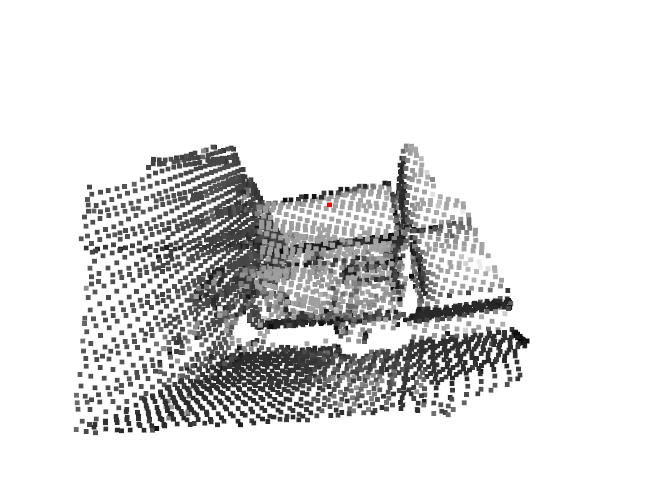

In [3]:
# pick the 1500th point as the anchor point and paint it red.
print("Paint the 1500th point red.")
pcd.colors[1500] = [1, 0, 0]

if draw_bit:
    o3d.visualization.draw_geometries([pcd])

### Testing KDTree in Open3D

In [4]:
print("Testing KDTree in Open3D ...")
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

pcd_tree

Testing KDTree in Open3D ...


### Using search_knn_vector_3d 


Find its 200 nearest neighbors of the 1500th point (red point), and paint them blue.


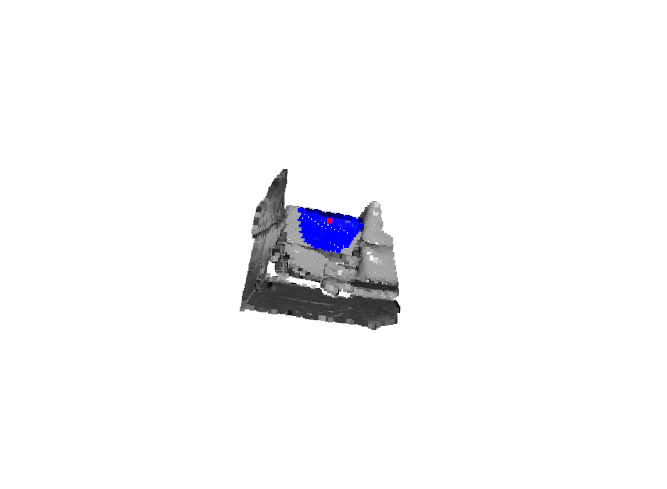

In [5]:
# returns a list of indices of the k nearest neighbors of the anchor point (the 1500th point).
# These neighboring points are painted with blue color. 
# skip the first index since it is the anchor point itself.
print("Find its 200 nearest neighbors of the 1500th point (red point), and paint them blue.")
[k, idx, _] = pcd_tree.search_knn_vector_3d(pcd.points[1500], 200)
np.asarray(pcd.colors)[idx[1:], :] = [0, 0, 1]

if draw_bit:
    o3d.visualization.draw_geometries([pcd])

### Using search_radius_vector_3d


Find its neighbors with distance less than 0.2, and paint them green.


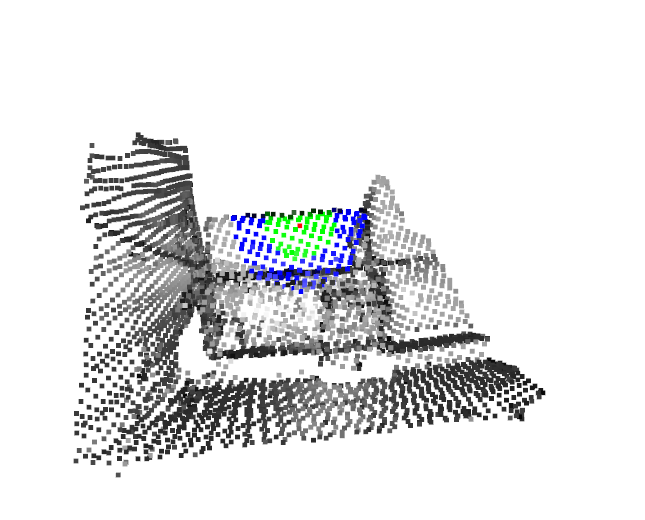

In [6]:
# to query all points with distances to the anchor point less than a given radius.
# paint these points with a green color.
print("Find its neighbors with distance less than 0.2, and paint them green.")
[k, idx, _] = pcd_tree.search_radius_vector_3d(pcd.points[1500], 0.2)
np.asarray(pcd.colors)[idx[1:], :] = [0, 1, 0]

if draw_bit:
    o3d.visualization.draw_geometries([pcd])

### Using search_hybrid_vector_3d


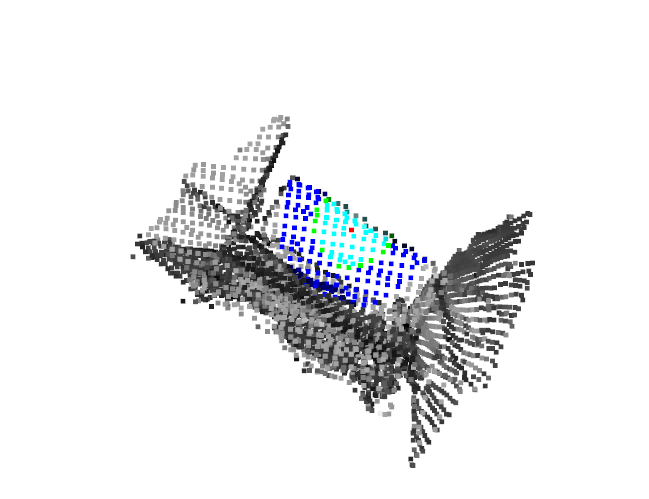

In [7]:
# Radius K Neasrest Neighbors Search (Hybrid search)
[k, idx, _] = pcd_tree.search_hybrid_vector_3d(pcd.points[1500], 0.2, 50)
np.asarray(pcd.colors)[idx[1:], :] = [0, 1, 1]
if draw_bit:
    o3d.visualization.draw_geometries([pcd])


### Visualize the point cloud

Visualize the point cloud.


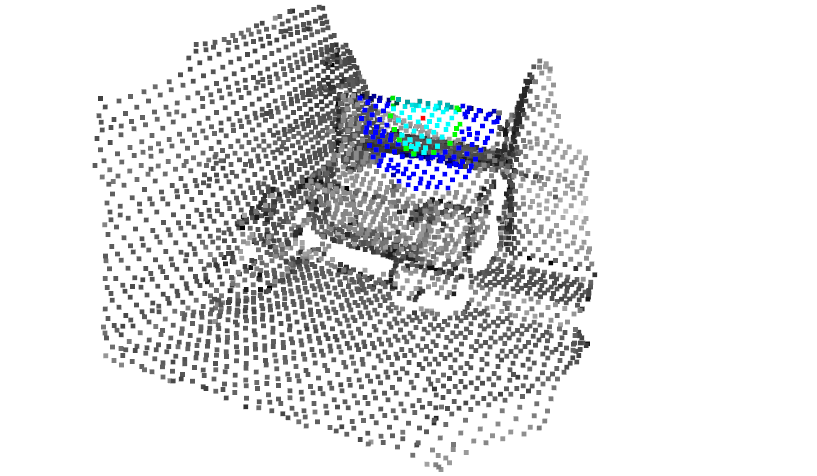

In [8]:
print("Visualize the point cloud.")
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.5599,
                                  front=[-0.4958, 0.8229, 0.2773],
                                  lookat=[2.1126, 1.0163, -1.8543],
                                  up=[0.1007, -0.2626, 0.9596],
                                  point_show_normal=False)